## Import Libraries

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plt

print("Libraries imported successfully!")


Libraries imported successfully!


## Load the Dataset

In [3]:
# Load the dataset
credit_card_data = pd.read_csv('creditcard.csv')  # Replace 'creditcard.csv' with the full path if necessary
print("Dataset loaded successfully!")

# Display the first few rows of the dataset
print(credit_card_data.head())


Dataset loaded successfully!
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

   

## Preprocess the Data

In [4]:
# Drop the 'Time' column
credit_card_data = credit_card_data.drop(columns=['Time'])

# Normalize the 'Amount' column
scaler = MinMaxScaler()
credit_card_data['Amount'] = scaler.fit_transform(credit_card_data[['Amount']])

print("Preprocessing completed!")


Preprocessing completed!


##  Separate Features and Target Variable

In [6]:
# Separate features and target variable
X = credit_card_data.drop(columns=['Class']).values  # Features
y = credit_card_data['Class'].values  # Target variable (fraud: 1, normal: 0)

print("Features and target variable separated!")



Features and target variable separated!


## Split the Data into Training and Testing Sets

In [7]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training and testing sets created!")
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)


Training and testing sets created!
Training set shape: (227845, 29)
Testing set shape: (56962, 29)


## Train a Random Forest Classifier

In [8]:
# Train a Random Forest Classifier
model = RandomForestClassifier(random_state=42, n_estimators=100)
model.fit(X_train, y_train)

print("Model trained successfully!")


Model trained successfully!


## Make Predictions

In [9]:
# Make predictions on the test set
y_pred = model.predict(X_test)

print("Predictions completed!")


Predictions completed!


## Evaluate the Model

In [10]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Confusion Matrix
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9995611109160493

Confusion Matrix:
 [[56862     2]
 [   23    75]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.97      0.77      0.86        98

    accuracy                           1.00     56962
   macro avg       0.99      0.88      0.93     56962
weighted avg       1.00      1.00      1.00     56962



## Visualize Feature Importance

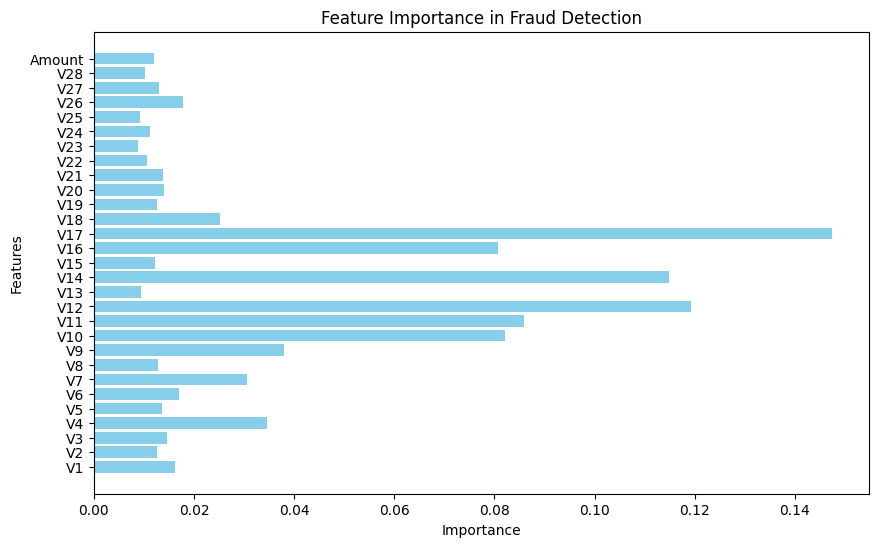

Feature importance visualized!


In [11]:
# Feature importance
feature_importance = model.feature_importances_
features = credit_card_data.drop(columns=['Class']).columns

# Visualize feature importance
plt.figure(figsize=(10, 6))
plt.barh(features, feature_importance, color='skyblue')
plt.title("Feature Importance in Fraud Detection")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()

print("Feature importance visualized!")


## Class Distribution

Class Distribution:
 Class
0    284315
1       492
Name: count, dtype: int64


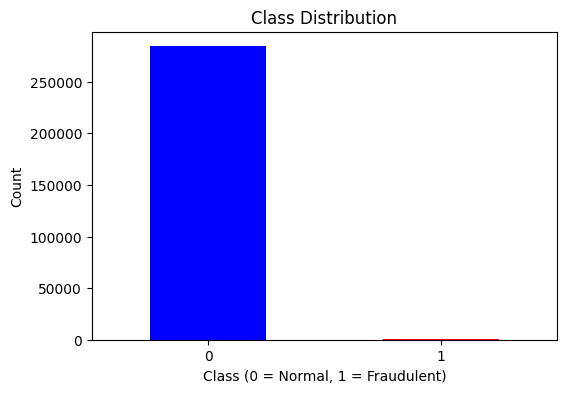

In [5]:
# Count the number of normal and fraudulent transactions
class_counts = credit_card_data['Class'].value_counts()
print("Class Distribution:\n", class_counts)

# Visualize the class distribution
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
class_counts.plot(kind='bar', color=['blue', 'red'])
plt.title('Class Distribution')
plt.xlabel('Class (0 = Normal, 1 = Fraudulent)')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


##  Correlation Analysis

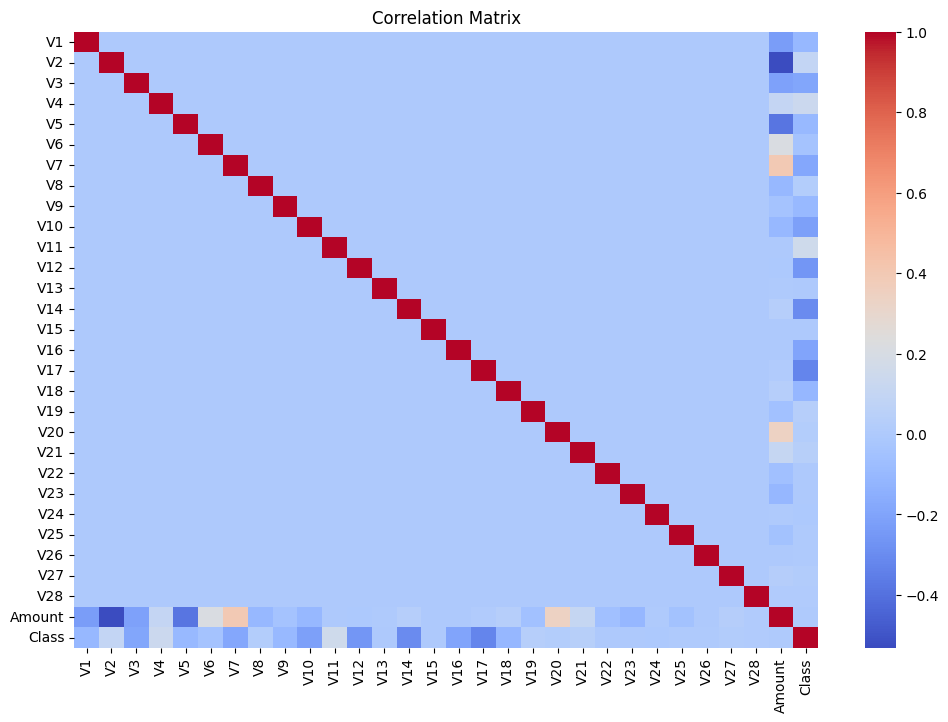

In [6]:
# Compute the correlation matrix
correlation_matrix = credit_card_data.corr()

# Visualize the correlation matrix
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False, fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


## Transaction Amount Distribution

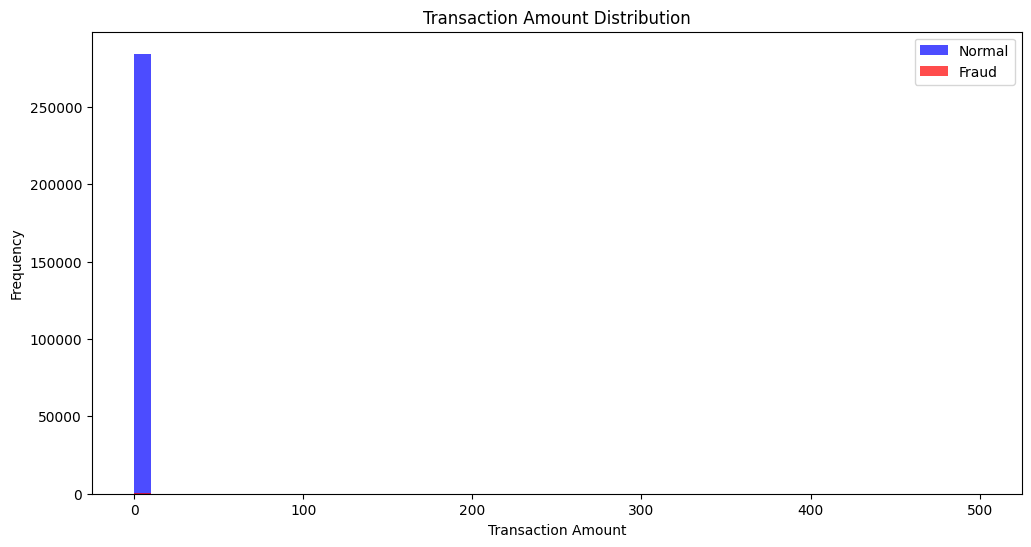

In [7]:
# Separate normal and fraudulent transactions
normal_transactions = credit_card_data[credit_card_data['Class'] == 0]
fraudulent_transactions = credit_card_data[credit_card_data['Class'] == 1]

# Plot transaction amount distribution for normal and fraudulent transactions
plt.figure(figsize=(12, 6))

plt.hist(normal_transactions['Amount'], bins=50, alpha=0.7, label='Normal', color='blue', range=(0, 500))
plt.hist(fraudulent_transactions['Amount'], bins=50, alpha=0.7, label='Fraud', color='red', range=(0, 500))

plt.title('Transaction Amount Distribution')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.legend()
plt.show()


## Feature Importance

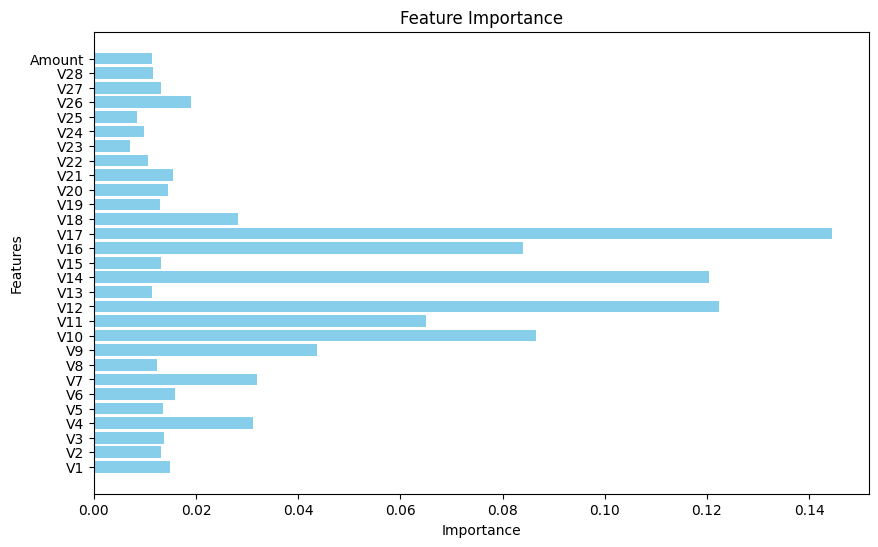

In [9]:
# Train a Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

X = credit_card_data.drop(columns=['Class'])
y = credit_card_data['Class']

model = RandomForestClassifier(random_state=42, n_estimators=100)
model.fit(X, y)

# Extract feature importance
feature_importance = model.feature_importances_
features = X.columns

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(features, feature_importance, color='skyblue')
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()


## Fraud Proportion by Amount Range

C:\Users\nwala\AppData\Local\Temp\ipykernel_17344\3992389507.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fraud_proportion = credit_card_data.groupby('AmountRange')['Class'].mean()


Fraud Proportion by Amount Range:
 AmountRange
0-10       0.001643
10-50           NaN
50-100          NaN
100-500         NaN
500+            NaN
Name: Class, dtype: float64


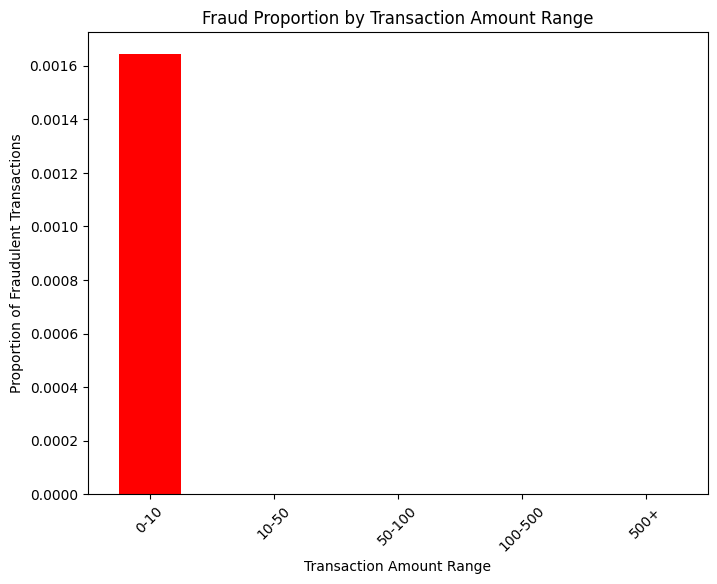

In [10]:
# Create bins for transaction amounts
credit_card_data['AmountRange'] = pd.cut(credit_card_data['Amount'], bins=[0, 10, 50, 100, 500, 2000], 
                                         labels=['0-10', '10-50', '50-100', '100-500', '500+'])

# Calculate fraud proportion by amount range
fraud_proportion = credit_card_data.groupby('AmountRange')['Class'].mean()
print("Fraud Proportion by Amount Range:\n", fraud_proportion)

# Plot fraud proportion
fraud_proportion.plot(kind='bar', color='red', figsize=(8, 6))
plt.title("Fraud Proportion by Transaction Amount Range")
plt.xlabel("Transaction Amount Range")
plt.ylabel("Proportion of Fraudulent Transactions")
plt.xticks(rotation=45)
plt.show()


## Fraudulent vs. Normal Transactions by Time

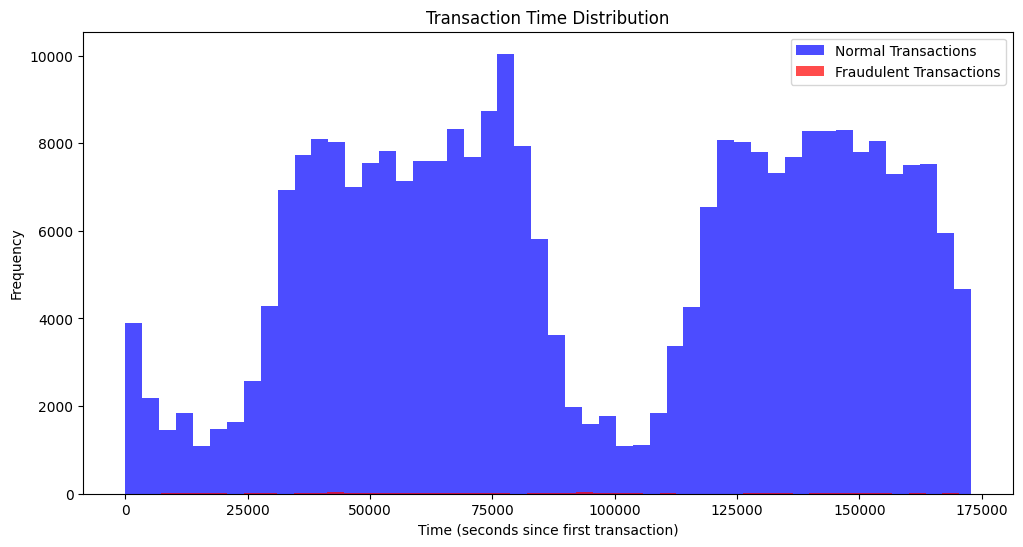

In [12]:
# Reload data with 'Time' column if it was dropped earlier
credit_card_data_with_time = pd.read_csv('creditcard.csv')

# Separate normal and fraudulent transactions
normal_time = credit_card_data_with_time[credit_card_data_with_time['Class'] == 0]['Time']
fraud_time = credit_card_data_with_time[credit_card_data_with_time['Class'] == 1]['Time']

# Plot transaction distribution over time
plt.figure(figsize=(12, 6))
plt.hist(normal_time, bins=50, alpha=0.7, label='Normal Transactions', color='blue')
plt.hist(fraud_time, bins=50, alpha=0.7, label='Fraudulent Transactions', color='red')
plt.title("Transaction Time Distribution")
plt.xlabel("Time (seconds since first transaction)")
plt.ylabel("Frequency")
plt.legend()
plt.show()


## Fraud Frequency by Hour

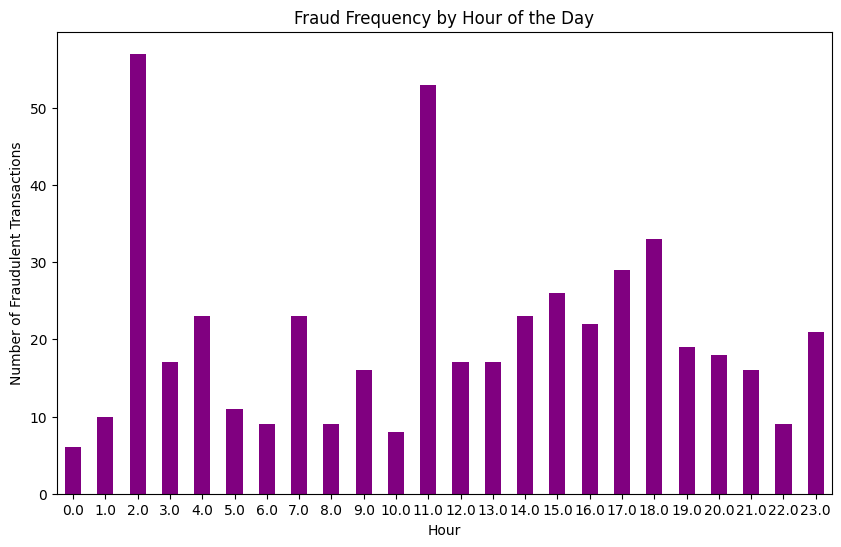

In [14]:
# Add a 'Hour' column derived from the 'Time' feature
credit_card_data_with_time['Hour'] = (credit_card_data_with_time['Time'] // 3600) % 24

# Group by hour and calculate fraud frequency
fraud_frequency_by_hour = credit_card_data_with_time[credit_card_data_with_time['Class'] == 1].groupby('Hour').size()

# Plot fraud frequency by hour
fraud_frequency_by_hour.plot(kind='bar', color='purple', figsize=(10, 6))
plt.title("Fraud Frequency by Hour of the Day")
plt.xlabel("Hour")
plt.ylabel("Number of Fraudulent Transactions")
plt.xticks(rotation=0)
plt.show()


## Fraud Amount as a Percentage of Total

Fraudulent Transactions Account for 0.24% of Total Transaction Value.


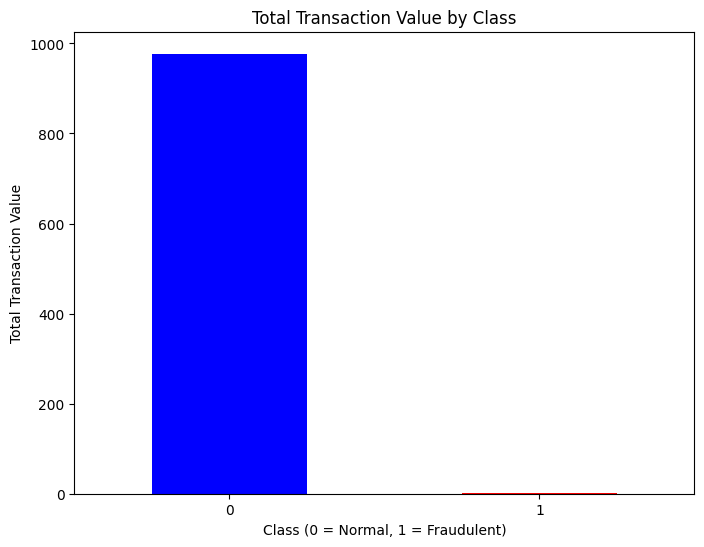

In [17]:
# Calculate total amounts for fraud and normal transactions
total_amounts = credit_card_data.groupby('Class')['Amount'].sum()

# Display as percentages
fraud_percentage = (total_amounts[1] / total_amounts.sum()) * 100
print(f"Fraudulent Transactions Account for {fraud_percentage:.2f}% of Total Transaction Value.")

# Visualize
total_amounts.plot(kind='bar', color=['blue', 'red'], figsize=(8, 6))
plt.title("Total Transaction Value by Class")
plt.xlabel("Class (0 = Normal, 1 = Fraudulent)")
plt.ylabel("Total Transaction Value")
plt.xticks(rotation=0)
plt.show()


## Proportion of Fraudulent Transactions## 

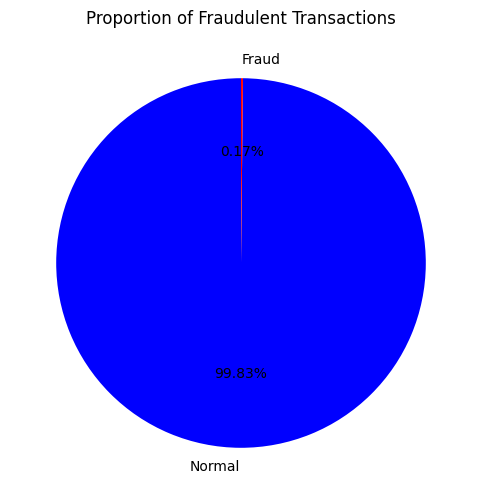

In [18]:
# Calculate class distribution
class_distribution = credit_card_data['Class'].value_counts()

# Plot a pie chart
plt.figure(figsize=(6, 6))
class_distribution.plot(kind='pie', autopct='%1.2f%%', colors=['blue', 'red'], labels=['Normal', 'Fraud'], startangle=90)
plt.title("Proportion of Fraudulent Transactions")
plt.ylabel("")  # Remove default ylabel
plt.show()


## Fraud Count by Feature Range

C:\Users\nwala\AppData\Local\Temp\ipykernel_17344\1890025194.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(credit_card_data[credit_card_data['Class'] == 0]['V17'], label='Normal', color='blue', shade=True)
C:\Users\nwala\AppData\Local\Temp\ipykernel_17344\1890025194.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(credit_card_data[credit_card_data['Class'] == 1]['V17'], label='Fraud', color='red', shade=True)


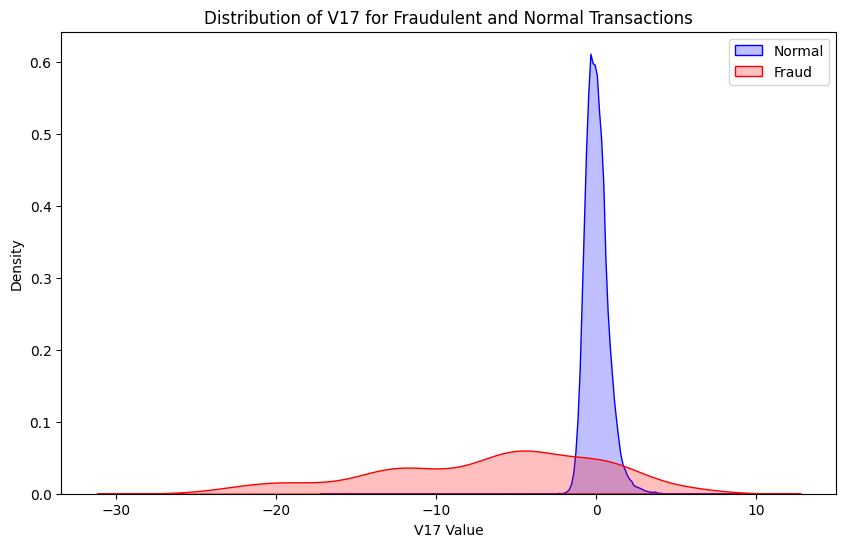

In [20]:
# Plot distributions for a selected feature (e.g., 'V17')
plt.figure(figsize=(10, 6))
sns.kdeplot(credit_card_data[credit_card_data['Class'] == 0]['V17'], label='Normal', color='blue', shade=True)
sns.kdeplot(credit_card_data[credit_card_data['Class'] == 1]['V17'], label='Fraud', color='red', shade=True)
plt.title("Distribution of V17 for Fraudulent and Normal Transactions")
plt.xlabel("V17 Value")
plt.ylabel("Density")
plt.legend()
plt.show()


##  Fraud Transaction Count by Feature Quartiles
For a selected feature, count the number of fraudulent transactions in each quartile.

C:\Users\nwala\AppData\Local\Temp\ipykernel_17344\1452193169.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fraud_by_quartile = credit_card_data[credit_card_data['Class'] == 1].groupby('V14_Quartile').size()


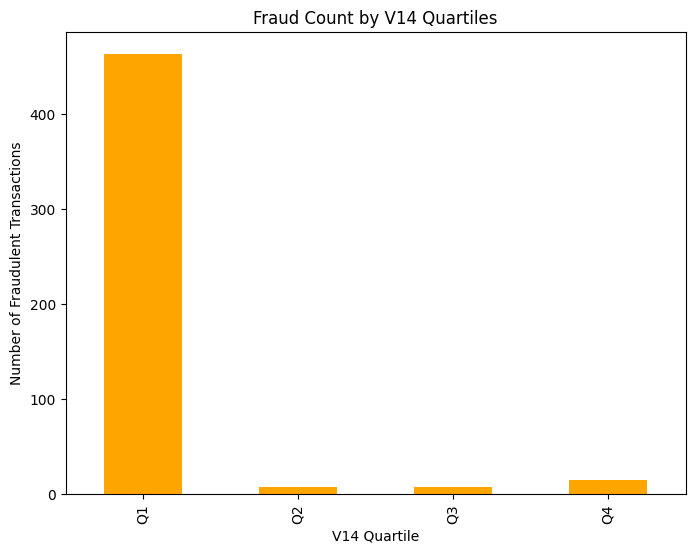

In [22]:
# Divide a selected feature (e.g., 'V14') into quartiles
credit_card_data['V14_Quartile'] = pd.qcut(credit_card_data['V14'], q=4, labels=['Q1', 'Q2', 'Q3', 'Q4'])

# Count frauds in each quartile
fraud_by_quartile = credit_card_data[credit_card_data['Class'] == 1].groupby('V14_Quartile').size()

# Plot fraud counts by quartile
fraud_by_quartile.plot(kind='bar', color='orange', figsize=(8, 6))
plt.title("Fraud Count by V14 Quartiles")
plt.xlabel("V14 Quartile")
plt.ylabel("Number of Fraudulent Transactions")
plt.show()


## Fraud Transaction Density by Hour

C:\Users\nwala\AppData\Local\Temp\ipykernel_17344\1009392510.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(credit_card_data_with_time[credit_card_data_with_time['Class'] == 1]['Hour'], label='Fraud', color='red', shade=True)


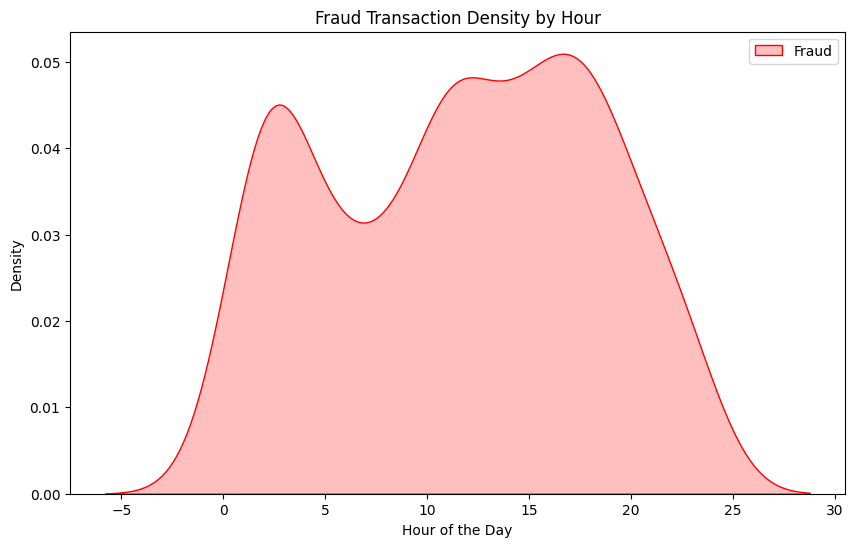

In [23]:
# Add a 'Hour' column if not already done
credit_card_data_with_time['Hour'] = (credit_card_data_with_time['Time'] // 3600) % 24

# Plot fraud transaction density by hour
plt.figure(figsize=(10, 6))
sns.kdeplot(credit_card_data_with_time[credit_card_data_with_time['Class'] == 1]['Hour'], label='Fraud', color='red', shade=True)
plt.title("Fraud Transaction Density by Hour")
plt.xlabel("Hour of the Day")
plt.ylabel("Density")
plt.legend()
plt.show()


##F raud and Normal Transaction Counts by Feature Intervals

C:\Users\nwala\AppData\Local\Temp\ipykernel_17344\1048237365.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  binned_counts = credit_card_data.groupby(['V12_Binned', 'Class']).size().unstack()


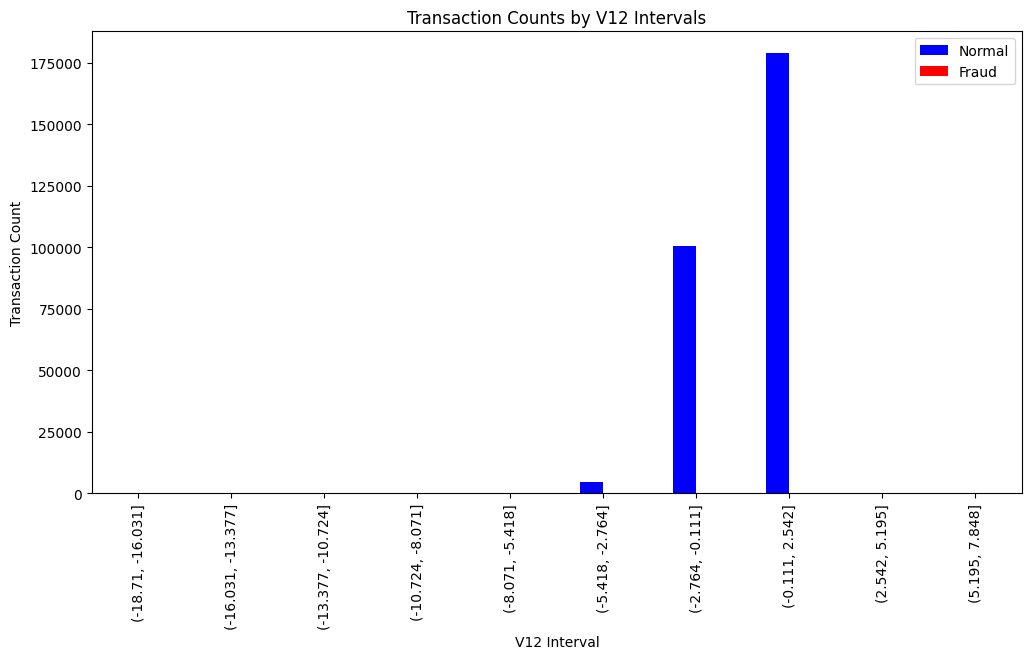

In [24]:
# Bin a selected feature (e.g., 'V12') into intervals
credit_card_data['V12_Binned'] = pd.cut(credit_card_data['V12'], bins=10)

# Group by binned intervals and Class
binned_counts = credit_card_data.groupby(['V12_Binned', 'Class']).size().unstack()

# Plot side-by-side bar chart
binned_counts.plot(kind='bar', figsize=(12, 6), color=['blue', 'red'])
plt.title("Transaction Counts by V12 Intervals")
plt.xlabel("V12 Interval")
plt.ylabel("Transaction Count")
plt.legend(['Normal', 'Fraud'], loc='upper right')
plt.show()


## Fraud Transaction Frequency by Top 10 Features
Identify the most important features contributing to fraud detection and visualize their distributions.

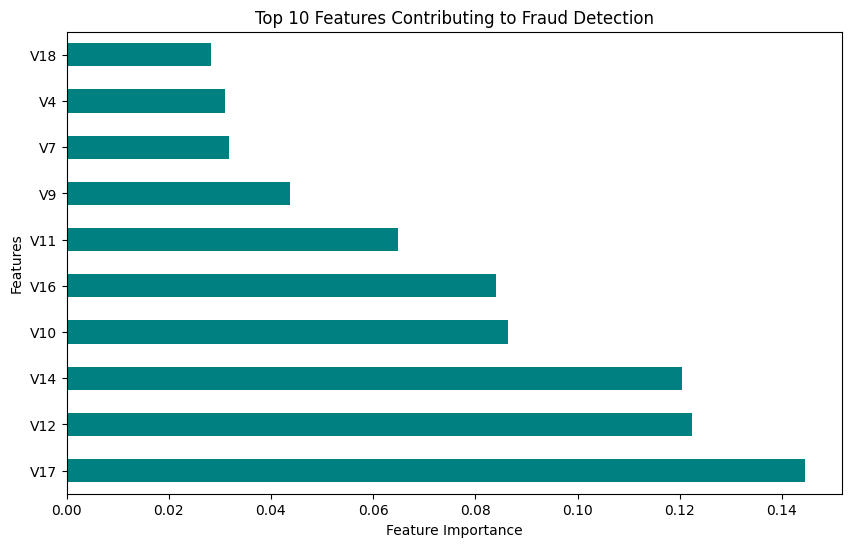

In [25]:
# Feature importance using Random Forest
feature_importance = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)[:10]

# Plot feature importance
plt.figure(figsize=(10, 6))
feature_importance.plot(kind='barh', color='teal')
plt.title("Top 10 Features Contributing to Fraud Detection")
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.show()
